In [7]:
# Add distance attribute to edges of needed graphs
from utils import add_dis_attr_to_edges
from config import abs_file_path  
import networkx as nx
import numpy as np
import json
import os


# n_values = [100]#[25, 50, 100, 200, 400]\
n_values = [500, 1000, 1500, 2000, 2500]
topo_indices = range(0, 10)
# file_path = abs_file_path + "/dist/topos/"
file_path = abs_file_path + "/dist/topos/map_size/"

for n in n_values:
    for topo_index in topo_indices:
        # file_name = "steiner-{n}-{topo_index}.json".format(n=n, topo_index=topo_index)
        file_name = "deepPlace-{n}-100-{topo_index}.json".format(n=n, topo_index=topo_index)
        file = file_path + file_name
        if not os.path.exists(file):
            print(file_name + " does not exist")
            continue
        with open(file, "r") as f:
            data = json.load(f)
            G = nx.json_graph.node_link_graph(data)
        G = add_dis_attr_to_edges(G)

        with open(file, 'w') as file:
          json.dump(nx.node_link_data(G), file)

        print(file_name + " saved")

deepPlace-500-100-0.json does not exist
deepPlace-500-100-1.json saved
deepPlace-500-100-2.json does not exist
deepPlace-500-100-3.json does not exist
deepPlace-500-100-4.json saved
deepPlace-500-100-5.json saved
deepPlace-500-100-6.json does not exist
deepPlace-500-100-7.json does not exist
deepPlace-500-100-8.json does not exist
deepPlace-500-100-9.json does not exist
deepPlace-1000-100-0.json saved
deepPlace-1000-100-1.json saved
deepPlace-1000-100-2.json does not exist
deepPlace-1000-100-3.json saved
deepPlace-1000-100-4.json saved
deepPlace-1000-100-5.json saved
deepPlace-1000-100-6.json does not exist
deepPlace-1000-100-7.json saved
deepPlace-1000-100-8.json saved
deepPlace-1000-100-9.json saved
deepPlace-1500-100-0.json saved
deepPlace-1500-100-1.json saved
deepPlace-1500-100-2.json does not exist
deepPlace-1500-100-3.json saved
deepPlace-1500-100-4.json does not exist
deepPlace-1500-100-5.json saved
deepPlace-1500-100-6.json saved
deepPlace-1500-100-7.json saved
deepPlace-1500-

In [1]:
# Allocate resource for all repeaters in all topologies
from resource_allocation import allocate_resource, allocate_resource_uniformly
import os
from config import abs_file_path

# dir_path = abs_file_path + "/dist/topos/"#[f for f in os.listdir("../dist/topos/")]
# dir_path = abs_file_path + "/dist/topos/map_size/"#[f for f in os.listdir("../dist/topos/")]
dir_path = abs_file_path + "/dist/topos/"#[f for f in os.listdir("../dist/topos/")]

graph_type = 1
topo_files = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]

# Remove all files that start with "solverBased"
topo_files = [f for f in topo_files if not f.startswith("solverBased")]
# topo_files = ["deepPlace-25-3.json"]
#topo_files = [f for f in topo_files if f.endswith("-0.json")]

print(topo_files)

for f in topo_files:
    allocate_resource_uniformly(topo_file_name=f, topo_allocated_file_name=f, graph_type=graph_type)
    # print("allocating resource for " + f)
    # # if topo_files is "waxman-x-y.json"
    # if f.split("-")[0] == "steiner":
        
    #   allocate_resource_uniformly(topo_file_name=f, topo_allocated_file_name=f, graph_type=graph_type) 

    # elif f.split("-")[0] == "deepPlace":
    #   allocate_resource_uniformly(topo_file_name=f, topo_allocated_file_name=f, graph_type=graph_type)
    #   #allocate_resource(topo_file_name=f, k=3, topo_allocated_file_name=f, graph_type=graph_type)
      
    # else:
    #   try :
    #     allocate_resource_uniformly(topo_file_name=f,topo_allocated_file_name=f, graph_type=graph_type)
    #   except:
    #     allocate_resource_uniformly(topo_file_name=f,topo_allocated_file_name=f, graph_type=graph_type)
    print ("resource allocated for " + f)
              

['mca-400-7.json', 'deepPlace-25-1.json', 'mca-200-2.json', 'waxman-200-5.json', 'steiner-400-2.json', 'waxman-200-4.json', 'mca-200-5.json', 'deepPlace-50-9.json', 'mca-400-4.json', 'waxman-25-1.json', 'steiner-400-7.json', 'steiner-50-9.json', 'waxman-400-0.json', 'deepPlace-25-3.json', 'deepPlace-400-1.json', 'steiner-50-5.json', 'mca-200-4.json', 'mca-100-7.json', 'waxman-400-4.json', 'steiner-100-8.json', 'deepPlace-100-5.json', 'steiner-200-7.json', 'mca-100-6.json', 'waxman-200-9.json', 'waxman-100-1.json', 'mca-50-2.json', 'waxman-100-6.json', 'mca-400-5.json', 'mca-100-3.json', 'steiner-100-5.json', 'mca-200-9.json', 'waxman-400-3.json', 'deepPlace-200-9.json', 'mca-25-4.json', 'waxman-200-0.json', 'steiner-400-5.json', 'deepPlace-100-3.json', 'waxman-25-2.json', 'steiner-25-1.json', 'deepPlace-200-6.json', 'deepPlace-25-6.json', 'mca-50-3.json', 'steiner-25-9.json', 'deepPlace-100-9.json', 'steiner-400-6.json', 'mca-25-2.json', 'waxman-50-7.json', 'mca-100-9.json', 'steiner-2

In [1]:
# Allocate resource for deepPlace normally and uniformly
from resource_allocation import allocate_resource, allocate_resource_uniformly, allocate_resource_greedy
import os
from config import abs_file_path

# dir_path = abs_file_path + "/dist/topos/"#[f for f in os.listdir("../dist/topos/")]
dir_path = abs_file_path + "/dist/topos/"#[f for f in os.listdir("../dist/topos/")]
graph_type = 0
topo_files = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]

# Remove all files that start with "solverBased"
topo_files = [f for f in topo_files if f.startswith("deepPlace-100")]
# topo_files = ["deepPlace-25-3.json"]


for f in topo_files:
    # print("allocating resource for " + f)
    allocate_resource_greedy(topo_file_name=f, k=3, topo_allocated_file_name=f, graph_type=graph_type)
    allocate_resource_uniformly(topo_file_name=f, topo_allocated_file_name=f, graph_type=graph_type) 
    print ("resource allocated uniformly for " + f)
              

total_resource_units before resource allocator: 374
crt total repater qubits num: 68
n=0: 0.875 0.7288135593220338 0.8446601941747572
nodes_score: {100: 0.8427287312818825, 101: 0.5825969502495749, 102: 0.3236847608469091, 103: 0.24040867889857934, 104: 0.003636662827052822, 105: 0.19695864873018482, 106: 0.05340560035105041, 107: 0.28288406423125445, 108: 0.34834776616751684, 109: 0.25638507212988865, 110: 0.1648977017168559, 111: 0.7892662223684932, 112: 0.12093566589874388, 113: 0.021838317974877952, 114: 0.06915350227634248, 115: 0.12602041166145575, 116: 0.7081768347869014, 117: 0.9184700852942789, 118: 0.9927083333333334, 119: 0.03686217843234052, 120: 0.060238398881026826, 121: 0.5794191555592123, 122: 0.6800012684438592, 123: 0.013575777521803521, 124: 0.2231064190115737, 125: 0.4405634633316877, 126: 0.5712097526191651, 127: 0.2304676786791728, 128: 0.5345064724919093, 129: 0.9157149909494816, 130: 0.7397093206626076, 131: 0.22326154626734684, 132: 0.08546654736437935, 133: 0.

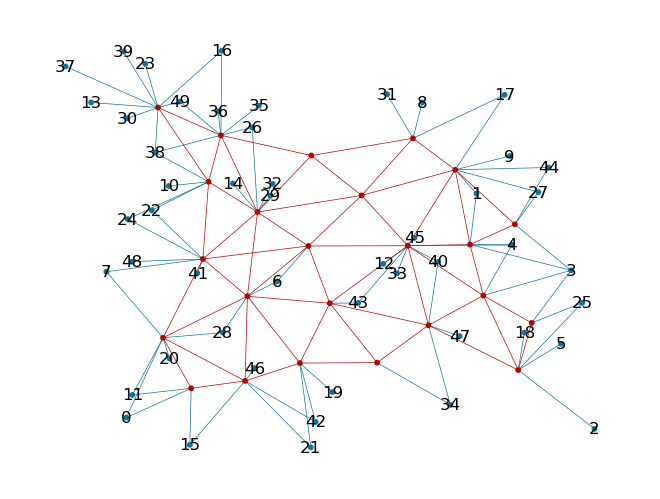

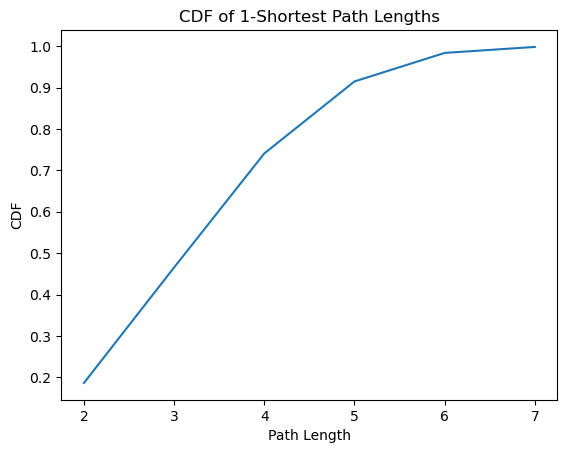

Average Hop Count: 2.6920289855072466
Standard Deviation of Path Lengths: 1.2347653914614172
Maximum Hop Number: 7
Minimum Hop Number: 2
Average Degree: 4.333333333333333
Average Edge dis: 160.15045858912907
Max Edge dis: 201.24015805609875
Min Edge dis: 96.8894198128935
repeater node number: 24


In [4]:
# Plot the graph and get path statistics
from topo_resilience_eval import get_path_statistics
from utils import graph_plot
import networkx as nx
import json

msize = 2000
topo_idx = 3
for i in  range(1,2):

  # graph_file = '../dist/topos/map_size/deepPlace-' + str(msize) + '-100-' + str(i) +'.json'.format(msize=msize)
  graph_file = '../dist/topos/deepPlace-' + '50-' + str(i) +'.json'

  with open (graph_file, 'r') as f:
      graph = json.load(f)
      G = nx.node_link_graph(graph)

  # for node in G.nodes:
  #   # Print the node and its attributes
  #   print(node, G.nodes[node]['type'])

  # for edge in G.edges:
  #   # Print the edge and its attributes
  #   print(edge, G.edges[edge]['type'])
  graph_plot(G)
  get_path_statistics(G, 1)

# for i in  [3]:

#   graph_file = '../dist/topos/map_size/steiner-' + str(msize) + '-100-' + str(i) +'.json'.format(msize=msize)

#   with open (graph_file, 'r') as f:
#       graph = json.load(f)
#       G = nx.node_link_graph(graph)

#   graph_plot(G)
#   get_path_statistics(G, 1)

# for i in  [3]:

#   graph_file = '../dist/topos/map_size/waxman-' + str(msize) + '-100-' + str(i) +'.json'.format(msize=msize)

#   with open (graph_file, 'r') as f:
#       graph = json.load(f)
#       G = nx.node_link_graph(graph)

#   graph_plot(G)
#   get_path_statistics(G, 1)

In [1]:
# Run a single topology algorithm with wanted endnode number
from endnodes_gen import endnode_graph_gen

from iter_kms_ga_differ_map_size import KmsGaDms
from grid_steiner_differ_map_size import construct_steiner_tree_different_map_size
from waxman_differ_map_size import construct_waxman_different_map_size
from grid_steiner import construct_steiner_tree
import os
from demand_gen import Demand
from config import abs_file_path

from multiprocessing import Pool



map_size_grid_size_map = {500: 10, 1000: 15, 1500: 16, 2000: 17, 2500: 19}
topo_num = 1
endnode_nums = [100, 25, 50, 200, 400]
map_sizes = [500, 1000, 1500]
endnodes_files = []

# # 生成文件列表
# for i in range(topo_num):
#     for endnode_num in endnode_nums:
#         f = "./dist/endnodes/endnodesLocs-8-0.json" #endnode_graph_gen(endnode_num, i)
#         endnodes_files.append(f)
# load all files in the directory
for map_size in map_sizes:
  for root, dirs, files in os.walk(abs_file_path + "/dist/endnodes/map_size"):
    # for root, dirs, files in os.walk(abs_file_path + "/dist/endnodes/"):
      for file in files:
          # only format: endnodesLocs-map_size-100-y.json
          if file.endswith(".json") and file.startswith("endnodesLocs") and file.split('-')[2] == "100" and file.split('-')[1] == str(map_size):
          # if file.endswith(".json") and file.startswith("endnodesLocs") and file.split('-')[1] == "100" and file.split('-')[2] == '2.json':
              endnodes_files.append(os.path.join(root, file))

# endnodes_files append all files like "endnodesLocs-x-100-y.json" in the directory

    
    

print("number of endnodes_files is ", len(endnodes_files))
# print all files
for f in endnodes_files:
    print("f: ", f)
    map_size = f.split('-')[1]
    #convert the map_size to int
    map_size = int(map_size)

    construct_steiner_tree_different_map_size(f, map_size=map_size, grid_size=map_size_grid_size_map[map_size])
    # construct_steiner_tree(f)
    
    print ("steiner tree generated for " + f)
    # kms = KmsGaDms()
    # kms.iterate_kms_ga(f, map_size=map_size, grid_size=map_size_grid_size_map[map_size])
    # print ("kms generated for " + f)
    # construct_waxman_different_map_size(f,3, 1500)
    # print ("waxman generated for " + f)

number of endnodes_files is  30
f:  /home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/map_size/endnodesLocs-500-100-3.json
steiner tree generated for /home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/map_size/endnodesLocs-500-100-3.json
f:  /home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/map_size/endnodesLocs-500-100-0.json
steiner tree generated for /home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/map_size/endnodesLocs-500-100-0.json
f:  /home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/map_size/endnodesLocs-500-100-1.json
steiner tree generated for /home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/map_size/endnodesLocs-500-100-1.json
f:  /home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/map_size/endnodesLocs-500-100-5.json
steiner tree generated for /home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/map_size/endnodesLocs-500-100-5.json
f:  /home/ygan11/quantum_topo_design_2024/topo_gen/dist/endn

In [12]:
# Run MCA Code for map_size
import networkx as nx
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import json
import os
from collections import deque
import math
from config import abs_file_path
# map_size = 2000 # 1000
# grid_size = 19  # 15
# step_size = map_size / grid_size
map_size_grid_size_map = {500: 10, 1000: 15, 1500: 16, 2000: 17, 2500: 19}
color_map = {'endnode': '#10739E', 'repeater': '#B40504'}
def euclidean_distance(pos1, pos2):
    return np.sqrt((pos1[0] - pos2[0]) ** 2 + (pos1[1] - pos2[1]) ** 2)
def get_nearest_neighbors(graph, node, n_neighbors=2):
    node_pos = graph.nodes[node]['pos']
    distances = []

    for neighbor in graph.nodes:
        if neighbor != node:
            neighbor_pos = graph.nodes[neighbor]['pos']
            distance = euclidean_distance(node_pos, neighbor_pos)
            distances.append((neighbor, distance))

    distances.sort(key=lambda x: x[1])
    nearest_neighbors = [neighbor for neighbor, _ in distances[:n_neighbors]]
    return nearest_neighbors
def read_endnodes_init_grid_graph_without_edges(endnodes_graph_file, step_size=100):
    # Remove all edges
    # grid.remove_edges_from(G.edges())
    # Add all edges if the distance between two nodes is less than l_rr
    # Add all edges if the distance between two nodes is less than l_rr
    grid = nx.grid_2d_graph(grid_size, grid_size)

    # for node1 in grid.nodes:
    #     for node2 in grid.nodes:
    #         if node1 != node2:
    #             if math.sqrt((node1[0] - node2[0]) ** 2 + (node1[1] - node2[1]) ** 2) < l_rr:
    #                 grid.add_edge(node1, node2)

    # Calculate the intersection points' 2-D position in a map_sz x map_sz map

    intersection_points = []
    for node in grid.nodes:
        x = (node[0] + 0.5) * step_size
        y = (node[1] + 0.5) * step_size
        intersection_points.append((x, y))

    #print(intersection_points)

    # Add nodes to the graph
    for node, pos in zip(grid.nodes, intersection_points):
        grid.nodes[node]['pos'] = pos
        grid.nodes[node]['type'] = 'repeater'

    G = nx.Graph()

    with open(endnodes_graph_file, 'r') as f:
        endnodes_graph = json.load(f)
        nodes = endnodes_graph['nodes']

    for node in nodes:
        if node['type'] == 'endnode':
            pos = node['pos']
            num_qubits = node['num_qubits']
            G.add_node(node['id'], pos=pos, num_qubits=num_qubits, type='endnode')
    endnodes = [node for node in G.nodes if G.nodes[node]['type'] == 'endnode']

    # Add repeaters to G
    id_r = len(endnodes)
    for node, pos in zip(grid.nodes, intersection_points):
        G.add_node(id_r, pos=pos, type='repeater')
        id_r += 1

    # Connect endnodes to repeaters if the distance is less than l_er
    repeaters = [node for node in G.nodes if G.nodes[node]['type'] == 'repeater']

    # Return the graph and the endnodes
    return G, endnodes
def graph_plot(G):

    # draw the graph
    pos = nx.get_node_attributes(G, 'pos')
    node_colors = [color_map[G.nodes[n]['type']] for n in G.nodes()]
    edge_colors = [color_map[G.edges[e]['type']] for e in G.edges()]
    num_endnodes = len([n for n in G.nodes() if G.nodes[n]['type'] == 'endnode'])
    # only get labels for node which type is repeater

    # labels_qubits = {n: G.nodes[n]['num_qubits'] for n in G.nodes() if G.nodes[n]['type'] == 'repeater'}
    labels_id = {n: n for n in G.nodes()}
    # nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, width=0.5, node_size=10, labels=labels_qubits)
    # nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color=edge_colors, width=0.5, node_size=10)
    label_endnodes = {n: n for n in G.nodes() if G.nodes[n]['type'] == 'endnode'}
    nx.draw(G, pos, with_labels=True, labels=label_endnodes, node_color=node_colors, edge_color=edge_colors,
            width=0.5, node_size=10)
    plt.show()
    # Pause the program until the plot is closed
    # plt.savefig('graph.png')
def read_endnodes_init_grid_graph_with_grid_edges(endnodes_graph_file, grid_size=15):
    # Remove all edges
    # grid.remove_edges_from(G.edges())
    # Add all edges if the distance between two nodes is less than l_rr
    # Add all edges if the distance between two nodes is less than l_rr
    grid = nx.grid_2d_graph(grid_size, grid_size)

    # for node1 in grid.nodes:
    #     for node2 in grid.nodes:
    #         if node1 != node2:
    #             if math.sqrt((node1[0] - node2[0]) ** 2 + (node1[1] - node2[1]) ** 2) < l_rr:
    #                 grid.add_edge(node1, node2)

    # Calculate the intersection points' 2-D position in a map_sz x map_sz map

    intersection_points = []
    for node in grid.nodes:
        x = (node[0] + 0.5) * step_size
        y = (node[1] + 0.5) * step_size
        intersection_points.append((x, y))

    # print(intersection_points)

    # Add nodes to the graph
    for node, pos in zip(grid.nodes, intersection_points):
        grid.nodes[node]['pos'] = pos
        grid.nodes[node]['xcoord'] = pos[0]
        grid.nodes[node]['ycoord'] = pos[1]
        grid.nodes[node]['type'] = 'repeater'

    G = nx.Graph()

    with open(endnodes_graph_file, 'r') as f:
        endnodes_graph = json.load(f)
        nodes = endnodes_graph['nodes']

    for node in nodes:
        if node['type'] == 'endnode':
            pos = node['pos']

            num_qubits = node['num_qubits']
            G.add_node(node['id'], pos=pos, num_qubits=num_qubits, type='endnode', xcoord = pos[0], ycoord =pos[1])
    endnodes = [node for node in G.nodes if G.nodes[node]['type'] == 'endnode']

    grid_G_node_mappling = {}
    # Add repeaters to G
    id_r = len(endnodes)
    for node, pos in zip(grid.nodes, intersection_points):
        grid_G_node_mappling[node] = id_r
        G.add_node(id_r, pos=pos, type='repeater', xcoord = pos[0], ycoord =pos[1])
        id_r += 1

    # Add edges between repeaters in G to form a grid
    for edges in grid.edges:
        dis = ((grid.nodes[edges[0]]['pos'][0] - grid.nodes[edges[1]]['pos'][0]) ** 2 + (
                grid.nodes[edges[0]]['pos'][1] - grid.nodes[edges[1]]['pos'][1]) ** 2) ** 0.5
        G.add_edge(grid_G_node_mappling[edges[0]], grid_G_node_mappling[edges[1]], type='repeater', dis=dis)

    # print(f'Number of nodes in G: {len(G.nodes)}')
    # graph_plot(G)

    # Connect endnodes to repeaters if the distance is less than l_er
    repeaters = [node for node in G.nodes if G.nodes[node]['type'] == 'repeater']

    # Return the graph and the endnodes
    return G, endnodes

class QuantumRepeaterDeployment:
    def __init__(self, nx_graph, Lmax, leaf_nodes=None):
        self.nx_graph = nx_graph
        self.Lmax = Lmax
        self.leaf_nodes = leaf_nodes if leaf_nodes else [n for n in nx_graph.nodes if nx_graph.degree[n] == 1]

    def choose_centers(self):
        Vleaf = self.leaf_nodes + [n for n in self.nx_graph.nodes if self.nx_graph.degree[n] == 1]
        # Vaccess = [n for n in self.nx_graph.nodes if any(leaf in Vleaf for leaf in self.nx_graph.neighbors(n)) and self.nx_graph.nodes[n]['type'] == 'repeater']
        Vaccess = set()
        repeater_nodes =[n for n in self.nx_graph.nodes if self.nx_graph.nodes[n]['type'] == 'repeater' ]
        for n in repeater_nodes:
            for leaf in self.nx_graph.neighbors(n):
                if leaf in Vleaf:
                    Vaccess.add(n)
        C = set()
        Vcovered = set()

        for v in Vaccess:
            # vleaf = [n for n in self.nx_graph.neighbors(v) if n in Vleaf]
            # if any(self.get_distance(l1, l2) > self.Lmax for l1 in vleaf for l2 in vleaf):
            #     C.add(v)
            #     Vcovered.update(self.get_coverage(v))
            neighbors = list(self.nx_graph.neighbors(v))
            vleaf = [n for n in neighbors if n in Vleaf]
            exceeds_Lmax = False
            for l1 in vleaf:
                for l2 in vleaf:
                    distance = self.get_distance(l1, l2)
                    if distance > self.Lmax:
                        exceeds_Lmax = True
                        break
                if exceeds_Lmax:
                    break
            if exceeds_Lmax:
                C.add(v)
                Vcovered.update(self.get_coverage_new(v))
        # find end nodes that are not covered by the centers
        endnodes = [ n for n in self.nx_graph.nodes if self.nx_graph.nodes[n]['type'] == 'endnode']
        Vremaining = set(endnodes) - Vcovered
        remaining_repear = set([n for n in self.nx_graph.nodes if self.nx_graph.nodes[n]['type'] == 'repeater']) - C

        while Vremaining:
            max_coverage_node = None
            max_coverage_size = 0
            # get the first end node
            endnode = Vremaining.pop()
            Vremaining.add(endnode)
            # print endnode pos
            # print(self.nx_graph.nodes[endnode]['pos'])
            # get neighbors of end node
            candidates = list(self.nx_graph.neighbors(endnode))
            for node in candidates:
                ll = self.get_coverage_new(node)
                rr =   ll & Vremaining
                if not rr:
                    continue
                coverage_size = len(rr)
                if coverage_size > max_coverage_size:
                    # if self.nx_graph.nodes[node]['type'] == 'endnode':
                    #     continue
                    max_coverage_node = node
                    max_coverage_size = coverage_size


            v = max_coverage_node
            C.add(v)
            Vcovered.update(self.get_coverage_new(v))
            Vremaining = set(endnodes) - Vcovered

        return C

    def get_distance(self, node1, node2):

        return nx.shortest_path_length(self.nx_graph, source=node1, target=node2, weight='dis')

    def get_coverage_old(self, node):

        return {n for n in self.nx_graph.nodes if self.get_distance(node, n) <= self.Lmax}

    def get_coverage_new(self, node):
        # Get all nodes within Lmax distance from the given node using BFS
        visited = {node}
        queue = deque([(node, 0)])
        coverage = set()

        while queue:
            current_node, current_distance = queue.popleft()
            if current_distance <= self.Lmax:
                if self.nx_graph.nodes[current_node]['type'] == 'endnode':
                    coverage.add(current_node)
                for neighbor in self.nx_graph.neighbors(current_node):
                    if neighbor not in visited:
                        edge_distance = self.nx_graph[current_node][neighbor].get('dis', 1)
                        if current_distance + edge_distance <= self.Lmax:
                            visited.add(neighbor)
                            queue.append((neighbor, current_distance + edge_distance))

        return coverage

    def find_intermediate_nodes(self, centers):
        # MST = self.minimum_spanning_tree_with_intermediates_new(centers)
        # I = set()
        #
        # for edge in MST:
        #     nodes = self.get_nodes_on_edge(edge)
        #     node1 = nodes[0]
        #     for i in range(1, len(nodes)):
        #         node2 = nodes[i]
        #         if self.get_distance(node1, node2) > self.Lmax:
        #             I.add(nodes[i-1])
        #             node1 = nodes[i-1]
        # subgraph = self.nx_graph.copy()
        # nodes_to_avoid = [n for n in self.nx_graph.nodes if self.nx_graph.nodes[n]['type'] == 'endnode']
        # subgraph.remove_nodes_from(self.nodes_to_avoid)
        mst = nx.minimum_spanning_tree(self.nx_graph, weight='dis')
        I = set()
        for c1 in centers:
            for c2 in centers:
                edges_to_include = []
                if c1 != c2:
                    path = nx.shortest_path(mst, source=c1, target=c2)
                    for i in range(len(path) - 1):
                        edges_to_include.append((path[i], path[i + 1]))
                if edges_to_include:
                    nodes = [edge[0] for edge in edges_to_include] + [edges_to_include[-1][1]]
                    node1 = nodes[0]
                    # node1 = edges_to_include[0][0]
                    # for i in range(1, len(edges_to_include)):
                    #     node2 = edges_to_include[i][1]
                    #     if self.get_distance(node1, node2) > self.Lmax:
                    #         if node1 not in centers:
                    #             I.add(node1)
                    #         node1 = node2
                    for i in range(1, len(nodes)):
                        node2 = nodes[i]
                        if self.get_distance(node1, node2) > self.Lmax:
                            if nodes[i-1] not in centers and self.nx_graph.nodes[nodes[i-1]]['type'] == 'repeater':
                                I.add(nodes[i-1])
                            node1 = nodes[i-1]


        return I

    def minimum_spanning_tree(self, centers):
        subgraph = self.nx_graph.subgraph(centers)
        mst = nx.minimum_spanning_tree(subgraph)
        return list(mst.edges())

    def minimum_spanning_tree_with_intermediates(self, centers):
        complete_subgraph = self.nx_graph.subgraph(centers).copy()
        for center in centers:
            for node in self.nx_graph.nodes:
                if node not in centers:
                    complete_subgraph.add_edge(center, node, weight=self.get_distance(center, node))

        mst = nx.minimum_spanning_tree(complete_subgraph, weight='dis')
        return list(mst.edges())

    def minimum_spanning_tree_with_intermediates_new(self, centers):
        # Find the MST of the entire graph
        mst = nx.minimum_spanning_tree(self.nx_graph)

        # Extract the relevant edges and intermediate nodes to connect centers
        edges_to_include = []
        for c1 in centers:
            for c2 in centers:
                if c1 != c2:
                    path = nx.shortest_path(mst, source=c1, target=c2)
                    for i in range(len(path) - 1):
                        edges_to_include.append((path[i], path[i + 1]))

        return edges_to_include

    def get_nodes_on_edge(self, edge):
        # Return the nodes that form the edge
        return list(edge)

if __name__ == "__main__":
    # file_path = abs_file_path + "/dist/endnodes/endnodesLocs-25-0.json"
    folder_path = abs_file_path + "/dist/endnodes/map_size/"
    files_list = os.listdir(folder_path)

    # files_list = [file_path]

    for file in files_list:
        file_path = folder_path + file
        # print(file_path)
        # map_size = int(file.split('-')[1])
        # # map_size = 2000
        # grid_size = map_size_grid_size_map[map_size]
        # step_size = map_size / grid_size

        # # file_path = abs_file_path + "/dist/endnodes/map_size/endnodesLocs-2000-100-0.json"
        # g, endnodes = read_endnodes_init_grid_graph_with_grid_edges(file_path, grid_size=grid_size)
        # nearest_neighbors = {endnode: get_nearest_neighbors(g, endnode,5) for endnode in endnodes}
        # for endnode in endnodes:
        #     for neighbor in nearest_neighbors[endnode]:
        #         # get distance of an edges
        #         dis = ((g.nodes[endnode]['pos'][0] - g.nodes[neighbor]['pos'][0]) ** 2 + (
        #                 g.nodes[endnode]['pos'][1] - g.nodes[neighbor]['pos'][1]) ** 2) ** 0.5
        #         #print(dis)
        #         if dis < 250:
        #             g.add_edge(endnode, neighbor, type='endnode',dis = dis)
        # endnodes = [node for node in g.nodes if g.nodes[node]['type'] == 'endnode']
        # repeaters = [node for node in g.nodes if g.nodes[node]['type'] == 'repeater']

        # # assert len(endnodes) + len(repeaters) == len(g.nodes)

        # # Add edges to G for every pair of nodes
        # # if the distance between two repeaters is less than l_rr
        # for node1 in repeaters:
        #     for node2 in repeaters:
        #         if node1 != node2:
        #             dis = math.sqrt((g.nodes[node1]['pos'][0] - g.nodes[node2]['pos'][0]) ** 2 + (
        #                         g.nodes[node1]['pos'][1] - g.nodes[node2]['pos'][1]) ** 2)
        #             if dis < 200:  # l_rr:
        #                 g.add_edge(node1, node2, dis=dis, type='repeater')
        # # graph_plot(g)

        # # for endnode in endnodes:
        # #     for repeater in repeaters:
        # #         dis = math.sqrt((g.nodes[endnode]['pos'][0] - g.nodes[repeater]['pos'][0]) ** 2 + (
        # #                     g.nodes[endnode]['pos'][1] - g.nodes[repeater]['pos'][1]) ** 2)
        # #         if dis < 100:  # l_er:
        # #             g.add_edge(endnode, repeater, dis=dis, type='endnode')
        # # print(endnodes)

        # # plt.show()
        # Lmax = 100
        # deployment = QuantumRepeaterDeployment(g, Lmax, endnodes)
        # centers = deployment.choose_centers()
        # nodes = list(centers) + endnodes
        # # print(centers)
        # # graph_plot(g.subgraph(nodes))
        # inter_nodes = deployment.find_intermediate_nodes(centers)
        # nodes = list(centers) + list(inter_nodes) + endnodes
        # subgraph = g.subgraph(nodes)

        # repeater_nodes = [n for n in subgraph.nodes if subgraph.nodes[n]['type'] == 'repeater']
        # # for all repeater_nodes: allocate randomly 10-15 qubits
        # # print("Number of repeater nodes: ", len(repeater_nodes))
        # for node in repeater_nodes:
        #     # print(node)
        #     subgraph.nodes[node]['num_qubits'] = np.random.randint(10, 15)

        # # assert repeater nodes in subgraph has attribute num_qubits
        # assert all('num_qubits' in subgraph.nodes[node] for node in repeater_nodes)
        # for e in subgraph.edges:
        #     u, v = e
        #     if subgraph.nodes[u]['type'] == 'repeater' and subgraph.nodes[v]['type'] == 'repeater':
        #         subgraph.edges[e]['type'] = 'repeater'
        #     else:
        #         subgraph.edges[e]['type'] = 'endnode'
        #     subgraph.edges[e]['dis'] = math.sqrt((subgraph.nodes[u]['pos'][0] - subgraph.nodes[v]['pos'][0]) ** 2 + (
        #             subgraph.nodes[u]['pos'][1] - subgraph.nodes[v]['pos'][1]) ** 2)
        # # Save the graph
        endnode_file_name = file.split('/')[-1]
        useful_name_seg = endnode_file_name.split('-')[1] + '-' + endnode_file_name.split('-')[2] + '-' + endnode_file_name.split('-')[3]
        save_path = abs_file_path + "/dist/topos/map_size/mca-" + useful_name_seg
        # # print(savePath)
        # with open(save_path, 'w') as f:
        #     json.dump(nx.node_link_data(subgraph), f)
        # # print(len(centers) + len(inter_nodes))
        # print("MCA graph saved for " + save_path)
        # graph_plot(subgraph)
        graph_path = abs_file_path + "/dist/topos/map_size/mca-" + useful_name_seg
        graph_name = "mca-" + useful_name_seg
        allocate_resource_uniformly(graph_name, graph_name, 2)
        print("Resource allocated for " + graph_name)









Graph saved to /home/ygan11/quantum_topo_design_2024/QuantumRouting/topo_data/map_size/mca-2000-100-2.txt
Resource allocated for mca-2000-100-2.json
Graph saved to /home/ygan11/quantum_topo_design_2024/QuantumRouting/topo_data/map_size/mca-500-100-3.txt
Resource allocated for mca-500-100-3.json
Graph saved to /home/ygan11/quantum_topo_design_2024/QuantumRouting/topo_data/map_size/mca-500-100-0.txt
Resource allocated for mca-500-100-0.json
Graph saved to /home/ygan11/quantum_topo_design_2024/QuantumRouting/topo_data/map_size/mca-2000-100-9.txt
Resource allocated for mca-2000-100-9.json
Graph saved to /home/ygan11/quantum_topo_design_2024/QuantumRouting/topo_data/map_size/mca-500-100-1.txt
Resource allocated for mca-500-100-1.json
Graph saved to /home/ygan11/quantum_topo_design_2024/QuantumRouting/topo_data/map_size/mca-2500-100-5.txt
Resource allocated for mca-2500-100-5.json
Graph saved to /home/ygan11/quantum_topo_design_2024/QuantumRouting/topo_data/map_size/mca-1000-100-5.txt
Resour

['endnodesLocs-200-1.json', 'endnodesLocs-25-0.json', 'endnodesLocs-400-8.json', 'endnodesLocs-100-4.json', 'endnodesLocs-50-4.json', 'endnodesLocs-100-5.json', 'endnodesLocs-400-6.json', 'endnodesLocs-50-6.json', 'endnodesLocs-400-9.json', 'endnodesLocs-25-6.json', 'endnodesLocs-400-3.json', 'endnodesLocs-400-5.json', 'endnodesLocs-200-2.json', 'endnodesLocs-100-0.json', 'endnodesLocs-400-2.json', 'endnodesLocs-200-9.json', 'endnodesLocs-50-0.json', 'endnodesLocs-50-3.json', 'endnodesLocs-50-8.json', 'endnodesLocs-50-1.json', 'endnodesLocs-50-2.json', 'endnodesLocs-400-7.json', 'endnodesLocs-200-3.json', 'endnodesLocs-25-8.json', 'endnodesLocs-100-1.json', 'endnodesLocs-50-7.json', 'endnodesLocs-25-7.json', 'endnodesLocs-50-5.json', 'endnodesLocs-100-6.json', 'endnodesLocs-100-8.json', 'endnodesLocs-25-1.json', 'endnodesLocs-400-0.json', 'endnodesLocs-200-0.json', 'endnodesLocs-100-3.json', 'endnodesLocs-200-4.json', 'endnodesLocs-100-9.json', 'endnodesLocs-25-5.json', 'endnodesLocs-2

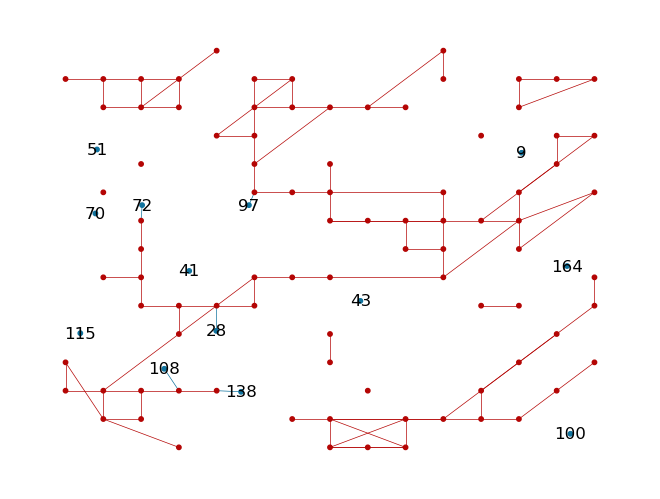

MCA graph saved for /home/ygan11/quantum_topo_design_2024/topo_gen/dist/topos/mca-25-0.json
Graph saved to /home/ygan11/quantum_topo_design_2024/QuantumRouting/topo_data/mca-25-0.txt
Resource allocated for mca-25-0.json


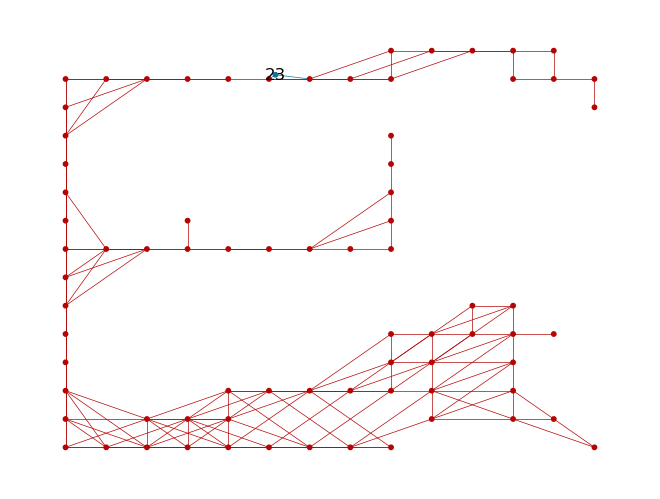

KeyboardInterrupt: 

In [22]:
# Run MCA Code for normal 
import networkx as nx
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import json
import os
from collections import deque
import math
from config import abs_file_path
from resource_allocation import allocate_resource_uniformly
# map_size = 2000 # 1000
# grid_size = 19  # 15
# step_size = map_size / grid_size
map_size_grid_size_map = {500: 10, 1000: 15, 1500: 16, 2000: 17, 2500: 19}
color_map = {'endnode': '#10739E', 'repeater': '#B40504'}
def euclidean_distance(pos1, pos2):
    return np.sqrt((pos1[0] - pos2[0]) ** 2 + (pos1[1] - pos2[1]) ** 2)
def get_nearest_neighbors(graph, node, n_neighbors=2):
    node_pos = graph.nodes[node]['pos']
    distances = []

    for neighbor in graph.nodes:
        if neighbor != node:
            neighbor_pos = graph.nodes[neighbor]['pos']
            distance = euclidean_distance(node_pos, neighbor_pos)
            distances.append((neighbor, distance))

    distances.sort(key=lambda x: x[1])
    nearest_neighbors = [neighbor for neighbor, _ in distances[:n_neighbors]]
    return nearest_neighbors
def read_endnodes_init_grid_graph_without_edges(endnodes_graph_file, step_size=100):
    # Remove all edges
    # grid.remove_edges_from(G.edges())
    # Add all edges if the distance between two nodes is less than l_rr
    # Add all edges if the distance between two nodes is less than l_rr
    grid = nx.grid_2d_graph(grid_size, grid_size)

    # for node1 in grid.nodes:
    #     for node2 in grid.nodes:
    #         if node1 != node2:
    #             if math.sqrt((node1[0] - node2[0]) ** 2 + (node1[1] - node2[1]) ** 2) < l_rr:
    #                 grid.add_edge(node1, node2)

    # Calculate the intersection points' 2-D position in a map_sz x map_sz map

    intersection_points = []
    for node in grid.nodes:
        x = (node[0] + 0.5) * step_size
        y = (node[1] + 0.5) * step_size
        intersection_points.append((x, y))

    #print(intersection_points)

    # Add nodes to the graph
    for node, pos in zip(grid.nodes, intersection_points):
        grid.nodes[node]['pos'] = pos
        grid.nodes[node]['type'] = 'repeater'

    G = nx.Graph()

    with open(endnodes_graph_file, 'r') as f:
        endnodes_graph = json.load(f)
        nodes = endnodes_graph['nodes']

    for node in nodes:
        if node['type'] == 'endnode':
            pos = node['pos']
            num_qubits = node['num_qubits']
            G.add_node(node['id'], pos=pos, num_qubits=num_qubits, type='endnode')
    endnodes = [node for node in G.nodes if G.nodes[node]['type'] == 'endnode']

    # Add repeaters to G
    id_r = len(endnodes)
    for node, pos in zip(grid.nodes, intersection_points):
        G.add_node(id_r, pos=pos, type='repeater')
        id_r += 1

    # Connect endnodes to repeaters if the distance is less than l_er
    repeaters = [node for node in G.nodes if G.nodes[node]['type'] == 'repeater']

    # Return the graph and the endnodes
    return G, endnodes
def graph_plot(G):

    # draw the graph
    pos = nx.get_node_attributes(G, 'pos')
    node_colors = [color_map[G.nodes[n]['type']] for n in G.nodes()]
    edge_colors = [color_map[G.edges[e]['type']] for e in G.edges()]
    num_endnodes = len([n for n in G.nodes() if G.nodes[n]['type'] == 'endnode'])
    # only get labels for node which type is repeater

    # labels_qubits = {n: G.nodes[n]['num_qubits'] for n in G.nodes() if G.nodes[n]['type'] == 'repeater'}
    labels_id = {n: n for n in G.nodes()}
    # nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, width=0.5, node_size=10, labels=labels_qubits)
    # nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color=edge_colors, width=0.5, node_size=10)
    label_endnodes = {n: n for n in G.nodes() if G.nodes[n]['type'] == 'endnode'}
    nx.draw(G, pos, with_labels=True, labels=label_endnodes, node_color=node_colors, edge_color=edge_colors,
            width=0.5, node_size=10)
    plt.show()
    # Pause the program until the plot is closed
    # plt.savefig('graph.png')
def read_endnodes_init_grid_graph_with_grid_edges(endnodes_graph_file, grid_size=15):
    # Remove all edges
    # grid.remove_edges_from(G.edges())
    # Add all edges if the distance between two nodes is less than l_rr
    # Add all edges if the distance between two nodes is less than l_rr
    grid = nx.grid_2d_graph(grid_size, grid_size)

    # for node1 in grid.nodes:
    #     for node2 in grid.nodes:
    #         if node1 != node2:
    #             if math.sqrt((node1[0] - node2[0]) ** 2 + (node1[1] - node2[1]) ** 2) < l_rr:
    #                 grid.add_edge(node1, node2)

    # Calculate the intersection points' 2-D position in a map_sz x map_sz map

    intersection_points = []
    for node in grid.nodes:
        x = (node[0] + 0.5) * step_size
        y = (node[1] + 0.5) * step_size
        intersection_points.append((x, y))

    # print(intersection_points)

    # Add nodes to the graph
    for node, pos in zip(grid.nodes, intersection_points):
        grid.nodes[node]['pos'] = pos
        grid.nodes[node]['xcoord'] = pos[0]
        grid.nodes[node]['ycoord'] = pos[1]
        grid.nodes[node]['type'] = 'repeater'

    G = nx.Graph()

    with open(endnodes_graph_file, 'r') as f:
        endnodes_graph = json.load(f)
        nodes = endnodes_graph['nodes']

    for node in nodes:
        if node['type'] == 'endnode':
            pos = node['pos']

            num_qubits = node['num_qubits']
            G.add_node(node['id'], pos=pos, num_qubits=num_qubits, type='endnode', xcoord = pos[0], ycoord =pos[1])
    endnodes = [node for node in G.nodes if G.nodes[node]['type'] == 'endnode']

    grid_G_node_mappling = {}
    # Add repeaters to G
    id_r = len(endnodes)
    for node, pos in zip(grid.nodes, intersection_points):
        grid_G_node_mappling[node] = id_r
        G.add_node(id_r, pos=pos, type='repeater', xcoord = pos[0], ycoord =pos[1])
        id_r += 1

    # Add edges between repeaters in G to form a grid
    for edges in grid.edges:
        dis = ((grid.nodes[edges[0]]['pos'][0] - grid.nodes[edges[1]]['pos'][0]) ** 2 + (
                grid.nodes[edges[0]]['pos'][1] - grid.nodes[edges[1]]['pos'][1]) ** 2) ** 0.5
        G.add_edge(grid_G_node_mappling[edges[0]], grid_G_node_mappling[edges[1]], type='repeater', dis=dis)

    # print(f'Number of nodes in G: {len(G.nodes)}')
    # graph_plot(G)

    # Connect endnodes to repeaters if the distance is less than l_er
    repeaters = [node for node in G.nodes if G.nodes[node]['type'] == 'repeater']

    # Return the graph and the endnodes
    return G, endnodes

class QuantumRepeaterDeployment:
    def __init__(self, nx_graph, Lmax, leaf_nodes=None):
        self.nx_graph = nx_graph
        self.Lmax = Lmax
        self.leaf_nodes = leaf_nodes if leaf_nodes else [n for n in nx_graph.nodes if nx_graph.degree[n] == 1]

    def choose_centers(self):
        Vleaf = self.leaf_nodes + [n for n in self.nx_graph.nodes if self.nx_graph.degree[n] == 1]
        # Vaccess = [n for n in self.nx_graph.nodes if any(leaf in Vleaf for leaf in self.nx_graph.neighbors(n)) and self.nx_graph.nodes[n]['type'] == 'repeater']
        Vaccess = set()
        repeater_nodes =[n for n in self.nx_graph.nodes if self.nx_graph.nodes[n]['type'] == 'repeater' ]
        for n in repeater_nodes:
            for leaf in self.nx_graph.neighbors(n):
                if leaf in Vleaf:
                    Vaccess.add(n)
        C = set()
        Vcovered = set()

        for v in Vaccess:
            # vleaf = [n for n in self.nx_graph.neighbors(v) if n in Vleaf]
            # if any(self.get_distance(l1, l2) > self.Lmax for l1 in vleaf for l2 in vleaf):
            #     C.add(v)
            #     Vcovered.update(self.get_coverage(v))
            neighbors = list(self.nx_graph.neighbors(v))
            vleaf = [n for n in neighbors if n in Vleaf]
            exceeds_Lmax = False
            for l1 in vleaf:
                for l2 in vleaf:
                    distance = self.get_distance(l1, l2)
                    if distance > self.Lmax:
                        exceeds_Lmax = True
                        break
                if exceeds_Lmax:
                    break
            if exceeds_Lmax:
                C.add(v)
                Vcovered.update(self.get_coverage_new(v))
        # find end nodes that are not covered by the centers
        endnodes = [ n for n in self.nx_graph.nodes if self.nx_graph.nodes[n]['type'] == 'endnode']
        Vremaining = set(endnodes) - Vcovered
        remaining_repear = set([n for n in self.nx_graph.nodes if self.nx_graph.nodes[n]['type'] == 'repeater']) - C

        while Vremaining:
            max_coverage_node = None
            max_coverage_size = 0
            # get the first end node
            endnode = Vremaining.pop()
            Vremaining.add(endnode)
            # print endnode pos
            # print(self.nx_graph.nodes[endnode]['pos'])
            # get neighbors of end node
            candidates = list(self.nx_graph.neighbors(endnode))
            for node in candidates:
                ll = self.get_coverage_new(node)
                rr =   ll & Vremaining
                if not rr:
                    continue
                coverage_size = len(rr)
                if coverage_size > max_coverage_size:
                    # if self.nx_graph.nodes[node]['type'] == 'endnode':
                    #     continue
                    max_coverage_node = node
                    max_coverage_size = coverage_size


            v = max_coverage_node
            C.add(v)
            Vcovered.update(self.get_coverage_new(v))
            Vremaining = set(endnodes) - Vcovered

        return C

    def get_distance(self, node1, node2):

        return nx.shortest_path_length(self.nx_graph, source=node1, target=node2, weight='dis')

    def get_coverage_old(self, node):

        return {n for n in self.nx_graph.nodes if self.get_distance(node, n) <= self.Lmax}

    def get_coverage_new(self, node):
        # Get all nodes within Lmax distance from the given node using BFS
        visited = {node}
        queue = deque([(node, 0)])
        coverage = set()

        while queue:
            current_node, current_distance = queue.popleft()
            if current_distance <= self.Lmax:
                if self.nx_graph.nodes[current_node]['type'] == 'endnode':
                    coverage.add(current_node)
                for neighbor in self.nx_graph.neighbors(current_node):
                    if neighbor not in visited:
                        edge_distance = self.nx_graph[current_node][neighbor].get('dis', 1)
                        if current_distance + edge_distance <= self.Lmax:
                            visited.add(neighbor)
                            queue.append((neighbor, current_distance + edge_distance))

        return coverage

    def find_intermediate_nodes(self, centers):
        # MST = self.minimum_spanning_tree_with_intermediates_new(centers)
        # I = set()
        #
        # for edge in MST:
        #     nodes = self.get_nodes_on_edge(edge)
        #     node1 = nodes[0]
        #     for i in range(1, len(nodes)):
        #         node2 = nodes[i]
        #         if self.get_distance(node1, node2) > self.Lmax:
        #             I.add(nodes[i-1])
        #             node1 = nodes[i-1]
        # subgraph = self.nx_graph.copy()
        # nodes_to_avoid = [n for n in self.nx_graph.nodes if self.nx_graph.nodes[n]['type'] == 'endnode']
        # subgraph.remove_nodes_from(self.nodes_to_avoid)
        mst = nx.minimum_spanning_tree(self.nx_graph, weight='dis')
        I = set()
        for c1 in centers:
            for c2 in centers:
                edges_to_include = []
                if c1 != c2:
                    path = nx.shortest_path(mst, source=c1, target=c2)
                    for i in range(len(path) - 1):
                        edges_to_include.append((path[i], path[i + 1]))
                if edges_to_include:
                    nodes = [edge[0] for edge in edges_to_include] + [edges_to_include[-1][1]]
                    node1 = nodes[0]
                    # node1 = edges_to_include[0][0]
                    # for i in range(1, len(edges_to_include)):
                    #     node2 = edges_to_include[i][1]
                    #     if self.get_distance(node1, node2) > self.Lmax:
                    #         if node1 not in centers:
                    #             I.add(node1)
                    #         node1 = node2
                    for i in range(1, len(nodes)):
                        node2 = nodes[i]
                        if self.get_distance(node1, node2) > self.Lmax:
                            if nodes[i-1] not in centers and self.nx_graph.nodes[nodes[i-1]]['type'] == 'repeater':
                                I.add(nodes[i-1])
                            node1 = nodes[i-1]


        return I

    def minimum_spanning_tree(self, centers):
        subgraph = self.nx_graph.subgraph(centers)
        mst = nx.minimum_spanning_tree(subgraph)
        return list(mst.edges())

    def minimum_spanning_tree_with_intermediates(self, centers):
        complete_subgraph = self.nx_graph.subgraph(centers).copy()
        for center in centers:
            for node in self.nx_graph.nodes:
                if node not in centers:
                    complete_subgraph.add_edge(center, node, weight=self.get_distance(center, node))

        mst = nx.minimum_spanning_tree(complete_subgraph, weight='dis')
        return list(mst.edges())

    def minimum_spanning_tree_with_intermediates_new(self, centers):
        # Find the MST of the entire graph
        mst = nx.minimum_spanning_tree(self.nx_graph)

        # Extract the relevant edges and intermediate nodes to connect centers
        edges_to_include = []
        for c1 in centers:
            for c2 in centers:
                if c1 != c2:
                    path = nx.shortest_path(mst, source=c1, target=c2)
                    for i in range(len(path) - 1):
                        edges_to_include.append((path[i], path[i + 1]))

        return edges_to_include

    def get_nodes_on_edge(self, edge):
        # Return the nodes that form the edge
        return list(edge)

if __name__ == "__main__":
    # file_path = abs_file_path + "/dist/endnodes/endnodesLocs-25-0.json"
    folder_path = abs_file_path + "/dist/endnodes/"
    files_list = os.listdir(folder_path)
    # drop all folders
    files_list = [file for file in files_list if '.' in file]
    print(files_list)

    # files_list = [file_path]

    for file in files_list:
        file_path = folder_path + file
        # print(file_path)
        map_size = 1000#int(file.split('-')[1])
        # map_size = 2000
        grid_size = 15 #map_size_grid_size_map[map_size]
        step_size = map_size / grid_size

        # file_path = abs_file_path + "/dist/endnodes/map_size/endnodesLocs-2000-100-0.json"
        g, endnodes = read_endnodes_init_grid_graph_with_grid_edges(file_path, grid_size=grid_size)
        # graph_plot(g)
        nearest_neighbors = {endnode: get_nearest_neighbors(g, endnode,5) for endnode in endnodes}
        for endnode in endnodes:
            for neighbor in nearest_neighbors[endnode]:
                # get distance of an edges
                dis = ((g.nodes[endnode]['pos'][0] - g.nodes[neighbor]['pos'][0]) ** 2 + (
                        g.nodes[endnode]['pos'][1] - g.nodes[neighbor]['pos'][1]) ** 2) ** 0.5
                #print(dis)
                if dis < 300:
                    # if degree of the node is less than 3
                    if g.degree(endnode) < 4:
                        g.add_edge(endnode, neighbor, type='endnode',dis = dis)
                
        endnodes = [node for node in g.nodes if g.nodes[node]['type'] == 'endnode']
        repeaters = [node for node in g.nodes if g.nodes[node]['type'] == 'repeater']

        # assert len(endnodes) + len(repeaters) == len(g.nodes)

        # Add edges to G for every pair of nodes
        # if the distance between two repeaters is less than l_rr
        for node1 in repeaters:
            for node2 in repeaters:
                if node1 != node2:
                    dis = math.sqrt((g.nodes[node1]['pos'][0] - g.nodes[node2]['pos'][0]) ** 2 + (
                                g.nodes[node1]['pos'][1] - g.nodes[node2]['pos'][1]) ** 2)
                    if dis < 200:  # l_rr:
                        if g.degree(node1) < 7:
                            g.add_edge(node1, node2, dis=dis, type='repeater')
                        # g.add_edge(node1, node2, dis=dis, type='repeater')
        # graph_plot(g)
        assert nx.is_connected(g)
        # for endnode in endnodes:
        #     for repeater in repeaters:
        #         dis = math.sqrt((g.nodes[endnode]['pos'][0] - g.nodes[repeater]['pos'][0]) ** 2 + (
        #                     g.nodes[endnode]['pos'][1] - g.nodes[repeater]['pos'][1]) ** 2)
        #         if dis < 100:  # l_er:
        #             g.add_edge(endnode, repeater, dis=dis, type='endnode')
        # print(endnodes)

        # plt.show()
        Lmax = 100
        deployment = QuantumRepeaterDeployment(g, Lmax, endnodes)
        centers = deployment.choose_centers()
        nodes = list(centers) + endnodes
        # print(centers)
        # graph_plot(g.subgraph(nodes))
        inter_nodes = deployment.find_intermediate_nodes(centers)
        nodes = list(centers) + list(inter_nodes) #+ endnodes
        subgraph = g.subgraph(nodes)

        repeater_nodes = [n for n in subgraph.nodes if subgraph.nodes[n]['type'] == 'repeater']
        # for all repeater_nodes: allocate randomly 10-15 qubits
        # print("Number of repeater nodes: ", len(repeater_nodes))
        for node in repeater_nodes:
            # print(node)
            subgraph.nodes[node]['num_qubits'] = np.random.randint(10, 15)

        # assert repeater nodes in subgraph has attribute num_qubits
        assert all('num_qubits' in subgraph.nodes[node] for node in repeater_nodes)
        for e in subgraph.edges:
            u, v = e
            if subgraph.nodes[u]['type'] == 'repeater' and subgraph.nodes[v]['type'] == 'repeater':
                subgraph.edges[e]['type'] = 'repeater'
            else:
                subgraph.edges[e]['type'] = 'endnode'
            subgraph.edges[e]['dis'] = math.sqrt((subgraph.nodes[u]['pos'][0] - subgraph.nodes[v]['pos'][0]) ** 2 + (
                    subgraph.nodes[u]['pos'][1] - subgraph.nodes[v]['pos'][1]) ** 2)
        # Save the graph
        endnode_file_name = file.split('/')[-1]
        useful_name_seg = endnode_file_name.split('-')[1] + '-' + endnode_file_name.split('-')[2] 
        save_path = abs_file_path + "/dist/topos/mca-" + useful_name_seg
        # print(savePath)
        with open(save_path, 'w') as f:
            json.dump(nx.node_link_data(subgraph), f)
        # print(len(centers) + len(inter_nodes))
        print("MCA graph saved for " + save_path)

        graph_path = abs_file_path + "/dist/topos/mca-" + useful_name_seg
        graph_name = "mca-" + useful_name_seg
        allocate_resource_uniformly(graph_name, graph_name, 0)
        print("Resource allocated for " + graph_name)
        

        
        graph_plot(subgraph)









In [7]:
# Allocate resource for deepPlace greedly and uniformly
from resource_allocation import allocate_resource, allocate_resource_uniformly
import os
from config import abs_file_path

# dir_path = abs_file_path + "/dist/topos/"#[f for f in os.listdir("../dist/topos/")]
# dir_path = abs_file_path + "/dist/topos/map_size/"#[f for f in os.listdir("../dist/topos/")]
dir_path = abs_file_path + "/dist/topos/"#[f for f in os.listdir("../dist/topos/")]

graph_type = 0
topo_files = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]

# Remove all files that start with "solverBased"
topo_files = [f for f in topo_files if not f.startswith("solverBased")]
# topo_files = ["deepPlace-25-3.json"]
#topo_files = [f for f in topo_files if f.endswith("-0.json")]

print(topo_files)

for f in topo_files:
    print("allocating resource for " + f)
    # if topo_files is "waxman-x-y.json"
    if f.split("-")[0] == "steiner":
        
      allocate_resource_uniformly(topo_file_name=f, topo_allocated_file_name=f, graph_type=graph_type) 

    elif f.split("-")[0] == "deepPlace":
      allocate_resource_uniformly(topo_file_name=f, topo_allocated_file_name=f, graph_type=graph_type)
      #allocate_resource(topo_file_name=f, k=3, topo_allocated_file_name=f, graph_type=graph_type)
      
    else:
      try :
        allocate_resource_uniformly(topo_file_name=f,topo_allocated_file_name=f, graph_type=graph_type)
      except:
        allocate_resource_uniformly(topo_file_name=f,topo_allocated_file_name=f, graph_type=graph_type)
    print ("resource allocated for " + f)
              

['deepPlace-25-1.json', 'waxman-200-5.json', 'steiner-400-2.json', 'waxman-200-4.json', 'deepPlace-50-9.json', 'waxman-25-1.json', 'steiner-400-7.json', 'steiner-50-9.json', 'waxman-400-0.json', 'deepPlace-25-3.json', 'deepPlace-400-1.json', 'steiner-50-5.json', 'waxman-400-4.json', 'steiner-100-8.json', 'deepPlace-100-5.json', 'steiner-200-7.json', 'waxman-200-9.json', 'waxman-100-1.json', 'waxman-100-6.json', 'steiner-100-5.json', 'waxman-400-3.json', 'deepPlace-200-9.json', 'waxman-200-0.json', 'steiner-400-5.json', 'deepPlace-100-3.json', 'waxman-25-2.json', 'steiner-25-1.json', 'deepPlace-200-6.json', 'deepPlace-25-6.json', 'steiner-25-9.json', 'deepPlace-100-9.json', 'steiner-400-6.json', 'waxman-50-7.json', 'steiner-25-2.json', 'waxman-400-9.json', 'deepPlace-200-2.json', 'deepPlace-100-8.json', 'waxman-400-2.json', 'waxman-400-6.json', 'deepPlace-100-4.json', 'steiner-50-8.json', 'deepPlace-25-9.json', 'waxman-400-5.json', 'waxman-400-7.json', 'steiner-25-7.json', 'deepPlace-50

['endnodesLocs-200-1.json', 'endnodesLocs-25-0.json', 'endnodesLocs-400-8.json', 'endnodesLocs-100-4.json', 'endnodesLocs-50-4.json', 'endnodesLocs-100-5.json', 'endnodesLocs-400-6.json', 'endnodesLocs-50-6.json', 'endnodesLocs-400-9.json', 'endnodesLocs-25-6.json', 'endnodesLocs-400-3.json', 'endnodesLocs-400-5.json', 'endnodesLocs-200-2.json', 'endnodesLocs-100-0.json', 'endnodesLocs-400-2.json', 'endnodesLocs-200-9.json', 'endnodesLocs-50-0.json', 'endnodesLocs-50-3.json', 'endnodesLocs-50-8.json', 'endnodesLocs-50-1.json', 'endnodesLocs-50-2.json', 'endnodesLocs-400-7.json', 'endnodesLocs-200-3.json', 'endnodesLocs-25-8.json', 'endnodesLocs-100-1.json', 'endnodesLocs-50-7.json', 'endnodesLocs-25-7.json', 'endnodesLocs-50-5.json', 'endnodesLocs-100-6.json', 'endnodesLocs-100-8.json', 'endnodesLocs-25-1.json', 'endnodesLocs-400-0.json', 'endnodesLocs-200-0.json', 'endnodesLocs-100-3.json', 'endnodesLocs-200-4.json', 'endnodesLocs-100-9.json', 'endnodesLocs-25-5.json', 'endnodesLocs-2

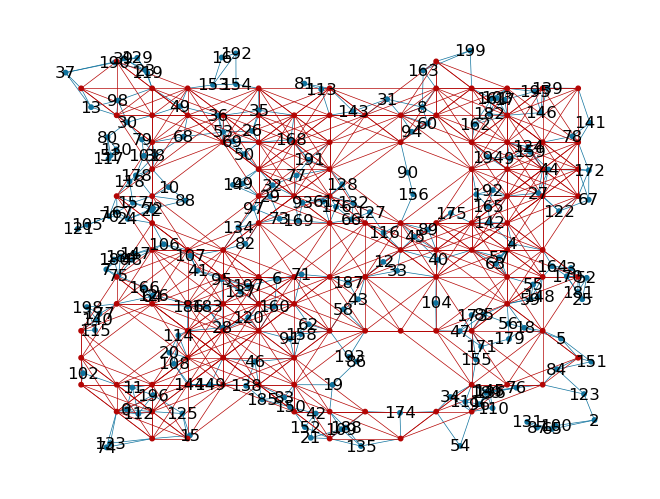

MCA graph saved for /home/ygan11/quantum_topo_design_2024/topo_gen/dist/topos/mca-200-1.json
Resource allocated for mca-200-1.json
/home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/endnodesLocs-25-0.json
7


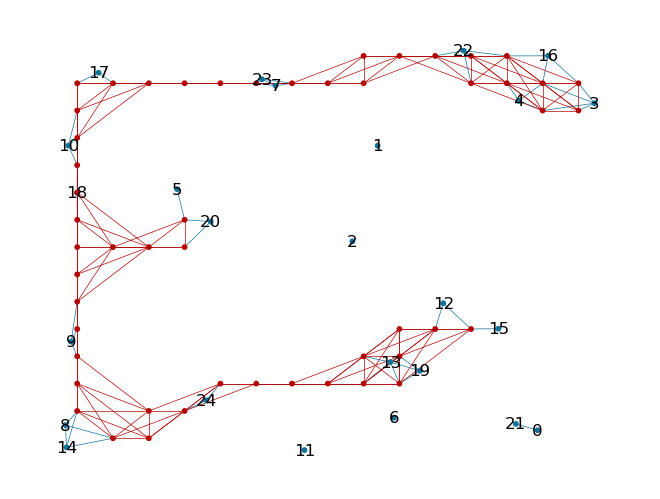

MCA graph saved for /home/ygan11/quantum_topo_design_2024/topo_gen/dist/topos/mca-25-0.json
Resource allocated for mca-25-0.json
/home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/endnodesLocs-400-8.json
41


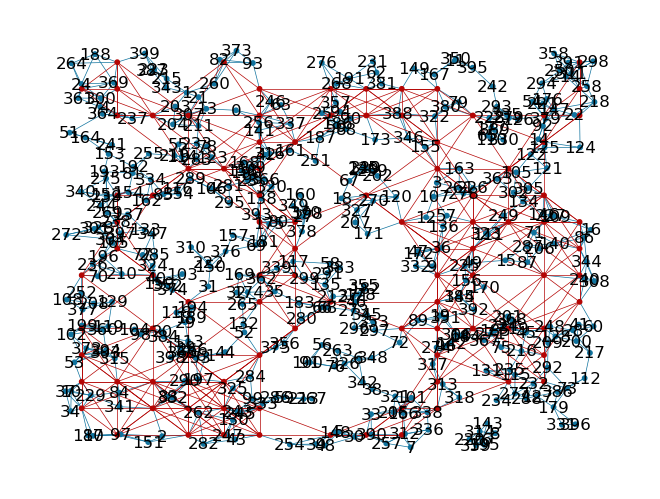

MCA graph saved for /home/ygan11/quantum_topo_design_2024/topo_gen/dist/topos/mca-400-8.json
Resource allocated for mca-400-8.json
/home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/endnodesLocs-100-4.json
48


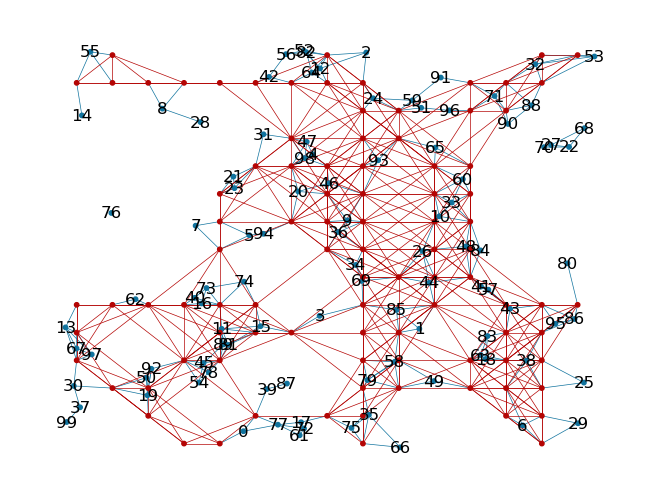

MCA graph saved for /home/ygan11/quantum_topo_design_2024/topo_gen/dist/topos/mca-100-4.json
Resource allocated for mca-100-4.json
/home/ygan11/quantum_topo_design_2024/topo_gen/dist/endnodes/endnodesLocs-50-4.json
38


KeyboardInterrupt: 

In [24]:
# Run MCA Code for normal 
import networkx as nx
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import json
import os
from collections import deque
import math
from config import abs_file_path
from resource_allocation import allocate_resource_uniformly
# map_size = 2000 # 1000
# grid_size = 19  # 15
# step_size = map_size / grid_size
map_size_grid_size_map = {500: 10, 1000: 15, 1500: 16, 2000: 17, 2500: 19}
color_map = {'endnode': '#10739E', 'repeater': '#B40504'}
def euclidean_distance(pos1, pos2):
    return np.sqrt((pos1[0] - pos2[0]) ** 2 + (pos1[1] - pos2[1]) ** 2)
def get_nearest_neighbors(graph, node, n_neighbors=5):
    node_pos = graph.nodes[node]['pos']
    distances = []

    for neighbor in graph.nodes:
        if neighbor != node:
            neighbor_pos = graph.nodes[neighbor]['pos']
            distance = euclidean_distance(node_pos, neighbor_pos)
            distances.append((neighbor, distance))

    distances.sort(key=lambda x: x[1])
    nearest_neighbors = [neighbor for neighbor, _ in distances[:n_neighbors]]
    return nearest_neighbors
def read_endnodes_init_grid_graph_without_edges(endnodes_graph_file, step_size=100):
    # Remove all edges
    # grid.remove_edges_from(G.edges())
    # Add all edges if the distance between two nodes is less than l_rr
    # Add all edges if the distance between two nodes is less than l_rr
    grid = nx.grid_2d_graph(grid_size, grid_size)

    # for node1 in grid.nodes:
    #     for node2 in grid.nodes:
    #         if node1 != node2:
    #             if math.sqrt((node1[0] - node2[0]) ** 2 + (node1[1] - node2[1]) ** 2) < l_rr:
    #                 grid.add_edge(node1, node2)

    # Calculate the intersection points' 2-D position in a map_sz x map_sz map

    intersection_points = []
    for node in grid.nodes:
        x = (node[0] + 0.5) * step_size
        y = (node[1] + 0.5) * step_size
        intersection_points.append((x, y))

    #print(intersection_points)

    # Add nodes to the graph
    for node, pos in zip(grid.nodes, intersection_points):
        grid.nodes[node]['pos'] = pos
        grid.nodes[node]['type'] = 'repeater'

    G = nx.Graph()

    with open(endnodes_graph_file, 'r') as f:
        endnodes_graph = json.load(f)
        nodes = endnodes_graph['nodes']

    for node in nodes:
        if node['type'] == 'endnode':
            pos = node['pos']
            num_qubits = node['num_qubits']
            G.add_node(node['id'], pos=pos, num_qubits=num_qubits, type='endnode')
    endnodes = [node for node in G.nodes if G.nodes[node]['type'] == 'endnode']

    # Add repeaters to G
    id_r = len(endnodes)
    for node, pos in zip(grid.nodes, intersection_points):
        G.add_node(id_r, pos=pos, type='repeater')
        id_r += 1

    # Connect endnodes to repeaters if the distance is less than l_er
    repeaters = [node for node in G.nodes if G.nodes[node]['type'] == 'repeater']

    # Return the graph and the endnodes
    return G, endnodes
def graph_plot(G):

    # draw the graph
    pos = nx.get_node_attributes(G, 'pos')
    node_colors = [color_map[G.nodes[n]['type']] for n in G.nodes()]
    edge_colors = [color_map[G.edges[e]['type']] for e in G.edges()]
    num_endnodes = len([n for n in G.nodes() if G.nodes[n]['type'] == 'endnode'])
    # only get labels for node which type is repeater

    # labels_qubits = {n: G.nodes[n]['num_qubits'] for n in G.nodes() if G.nodes[n]['type'] == 'repeater'}
    labels_id = {n: n for n in G.nodes()}
    # nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, width=0.5, node_size=10, labels=labels_qubits)
    # nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color=edge_colors, width=0.5, node_size=10)
    label_endnodes = {n: n for n in G.nodes() if G.nodes[n]['type'] == 'endnode'}
    nx.draw(G, pos, with_labels=True, labels=label_endnodes, node_color=node_colors, edge_color=edge_colors,
            width=0.5, node_size=10)
    plt.show()
    # Pause the program until the plot is closed
    # plt.savefig('graph.png')
def read_endnodes_init_grid_graph_with_grid_edges(endnodes_graph_file, grid_size=15):
    # Remove all edges
    # grid.remove_edges_from(G.edges())
    # Add all edges if the distance between two nodes is less than l_rr
    # Add all edges if the distance between two nodes is less than l_rr
    grid = nx.grid_2d_graph(grid_size, grid_size)

    # for node1 in grid.nodes:
    #     for node2 in grid.nodes:
    #         if node1 != node2:
    #             if math.sqrt((node1[0] - node2[0]) ** 2 + (node1[1] - node2[1]) ** 2) < l_rr:
    #                 grid.add_edge(node1, node2)

    # Calculate the intersection points' 2-D position in a map_sz x map_sz map

    intersection_points = []
    for node in grid.nodes:
        x = (node[0] + 0.5) * step_size
        y = (node[1] + 0.5) * step_size
        intersection_points.append((x, y))

    # print(intersection_points)

    # Add nodes to the graph
    for node, pos in zip(grid.nodes, intersection_points):
        grid.nodes[node]['pos'] = pos
        grid.nodes[node]['xcoord'] = pos[0]
        grid.nodes[node]['ycoord'] = pos[1]
        grid.nodes[node]['type'] = 'repeater'

    G = nx.Graph()

    with open(endnodes_graph_file, 'r') as f:
        endnodes_graph = json.load(f)
        nodes = endnodes_graph['nodes']

    for node in nodes:
        if node['type'] == 'endnode':
            pos = node['pos']

            num_qubits = node['num_qubits']
            G.add_node(node['id'], pos=pos, num_qubits=num_qubits, type='endnode', xcoord = pos[0], ycoord =pos[1])
    endnodes = [node for node in G.nodes if G.nodes[node]['type'] == 'endnode']

    grid_G_node_mappling = {}
    # Add repeaters to G
    id_r = len(endnodes)
    for node, pos in zip(grid.nodes, intersection_points):
        grid_G_node_mappling[node] = id_r
        G.add_node(id_r, pos=pos, type='repeater', xcoord = pos[0], ycoord =pos[1])
        id_r += 1

    # Add edges between repeaters in G to form a grid
    for edges in grid.edges:
        dis = ((grid.nodes[edges[0]]['pos'][0] - grid.nodes[edges[1]]['pos'][0]) ** 2 + (
                grid.nodes[edges[0]]['pos'][1] - grid.nodes[edges[1]]['pos'][1]) ** 2) ** 0.5
        G.add_edge(grid_G_node_mappling[edges[0]], grid_G_node_mappling[edges[1]], type='repeater', dis=dis)

    # print(f'Number of nodes in G: {len(G.nodes)}')
    # graph_plot(G)

    # Connect endnodes to repeaters if the distance is less than l_er
    repeaters = [node for node in G.nodes if G.nodes[node]['type'] == 'repeater']

    # Return the graph and the endnodes
    return G, endnodes

class QuantumRepeaterDeployment:
    def __init__(self, nx_graph, Lmax, leaf_nodes=None):
        self.nx_graph = nx_graph
        self.Lmax = Lmax
        self.leaf_nodes = leaf_nodes if leaf_nodes else [n for n in nx_graph.nodes if nx_graph.degree[n] == 1]

    def choose_centers(self):
        Vleaf = self.leaf_nodes + [n for n in self.nx_graph.nodes if self.nx_graph.degree[n] == 1]
        # Vaccess = [n for n in self.nx_graph.nodes if any(leaf in Vleaf for leaf in self.nx_graph.neighbors(n)) and self.nx_graph.nodes[n]['type'] == 'repeater']
        Vaccess = set()
        repeater_nodes =[n for n in self.nx_graph.nodes if self.nx_graph.nodes[n]['type'] == 'repeater' ]
        for n in repeater_nodes:
            for leaf in self.nx_graph.neighbors(n):
                if leaf in Vleaf:
                    Vaccess.add(n)
        C = set()
        Vcovered = set()

        for v in Vaccess:
            # vleaf = [n for n in self.nx_graph.neighbors(v) if n in Vleaf]
            # if any(self.get_distance(l1, l2) > self.Lmax for l1 in vleaf for l2 in vleaf):
            #     C.add(v)
            #     Vcovered.update(self.get_coverage(v))
            neighbors = list(self.nx_graph.neighbors(v))
            vleaf = [n for n in neighbors if n in Vleaf]
            exceeds_Lmax = False
            for l1 in vleaf:
                for l2 in vleaf:
                    distance = self.get_distance(l1, l2)
                    if distance > self.Lmax:
                        exceeds_Lmax = True
                        break
                if exceeds_Lmax:
                    break
            if exceeds_Lmax:
                if self.nx_graph.nodes[v]['type'] == 'repeater':
                    C.add(v)
                # C.add(v)
                Vcovered.update(self.get_coverage_new(v))
        # find end nodes that are not covered by the centers
        endnodes = [ n for n in self.nx_graph.nodes if self.nx_graph.nodes[n]['type'] == 'endnode']
        Vremaining = set(endnodes) - Vcovered
        remaining_repear = set([n for n in self.nx_graph.nodes if self.nx_graph.nodes[n]['type'] == 'repeater']) - C

        while Vremaining:
            max_coverage_node = None
            max_coverage_size = 0
            # get the first end node
            endnode = Vremaining.pop()
            Vremaining.add(endnode)
            # print endnode pos
            # print(self.nx_graph.nodes[endnode]['pos'])
            # get neighbors of end node
            candidates = list(self.nx_graph.neighbors(endnode))
            # candidates filter out the nodes that are endnode
            candidates = [n for n in candidates if self.nx_graph.nodes[n]['type'] == 'repeater']
            for node in candidates:
                ll = self.get_coverage_new_2(node)
                rr =   ll & Vremaining
                if not rr:
                    continue
                coverage_size = len(rr)
                if coverage_size > max_coverage_size:
                    # if self.nx_graph.nodes[node]['type'] == 'endnode':
                    #     continue
                    max_coverage_node = node
                    max_coverage_size = coverage_size
            if not max_coverage_node:
                # just add closest repeater in the candidates
                min_dis = float('inf')
                max_coverage_node = None
                for node in candidates:
                    dis = self.get_distance(endnode, node)
                    if dis < min_dis:
                        min_dis = dis
                        max_coverage_node = node
                C.add(max_coverage_node)
                coverage = set()
                coverage.add(endnode)
                Vcovered.update(coverage)
                Vremaining = set(endnodes) - Vcovered
                continue


            v = max_coverage_node
            C.add(v)
            Vcovered.update(self.get_coverage_new_2(v))
            Vremaining = set(endnodes) - Vcovered

        return C

    def get_distance(self, node1, node2):

        return nx.shortest_path_length(self.nx_graph, source=node1, target=node2, weight='dis')

    def get_coverage_old(self, node):

        return {n for n in self.nx_graph.nodes if self.get_distance(node, n) <= self.Lmax}

    def get_coverage_new(self, node):
        # Get all nodes within Lmax distance from the given node using BFS
        visited = {node}
        queue = deque([(node, 0)])
        coverage = set()

        while queue:
            current_node, current_distance = queue.popleft()
            if current_distance <= self.Lmax:
                if self.nx_graph.nodes[current_node]['type'] == 'endnode':
                    coverage.add(current_node)
                for neighbor in self.nx_graph.neighbors(current_node):
                    if neighbor not in visited:
                        edge_distance = self.nx_graph[current_node][neighbor].get('dis', 1)
                        if current_distance + edge_distance <= self.Lmax:
                            visited.add(neighbor)
                            queue.append((neighbor, current_distance + edge_distance))

        return coverage
    def get_coverage_new_2(self, node):
        # get all negighbors of current node
        neighbors = list(self.nx_graph.neighbors(node))
        covered = set()
        for neighbor in neighbors:
            if self.nx_graph.nodes[neighbor]['type'] == 'endnode' and self.get_distance(node, neighbor) <= self.Lmax:
                covered.add(neighbor)
        return covered
                
        

    def find_intermediate_nodes(self, centers):
        # MST = self.minimum_spanning_tree_with_intermediates_new(centers)
        # I = set()
        #
        # for edge in MST:
        #     nodes = self.get_nodes_on_edge(edge)
        #     node1 = nodes[0]
        #     for i in range(1, len(nodes)):
        #         node2 = nodes[i]
        #         if self.get_distance(node1, node2) > self.Lmax:
        #             I.add(nodes[i-1])
        #             node1 = nodes[i-1]
        # subgraph = self.nx_graph.copy()
        # nodes_to_avoid = [n for n in self.nx_graph.nodes if self.nx_graph.nodes[n]['type'] == 'endnode']
        # subgraph.remove_nodes_from(self.nodes_to_avoid)
        mst = nx.minimum_spanning_tree(self.nx_graph, weight='dis')
        I = set()
        for c1 in centers:
            for c2 in centers:
                edges_to_include = []
                if c1 != c2:
                    path = nx.shortest_path(mst, source=c1, target=c2)
                    for i in range(len(path) - 1):
                        edges_to_include.append((path[i], path[i + 1]))
                if edges_to_include:
                    nodes = [edge[0] for edge in edges_to_include] + [edges_to_include[-1][1]]
                    node1 = nodes[0]
                    # node1 = edges_to_include[0][0]
                    # for i in range(1, len(edges_to_include)):
                    #     node2 = edges_to_include[i][1]
                    #     if self.get_distance(node1, node2) > self.Lmax:
                    #         if node1 not in centers:
                    #             I.add(node1)
                    #         node1 = node2
                    for i in range(1, len(nodes)):
                        node2 = nodes[i]
                        if self.get_distance(node1, node2) > self.Lmax:
                            if nodes[i-1] not in centers and self.nx_graph.nodes[nodes[i-1]]['type'] == 'repeater':
                                I.add(nodes[i-1])
                            node1 = nodes[i-1]


        return I

    def minimum_spanning_tree(self, centers):
        subgraph = self.nx_graph.subgraph(centers)
        mst = nx.minimum_spanning_tree(subgraph)
        return list(mst.edges())

    def minimum_spanning_tree_with_intermediates(self, centers):
        complete_subgraph = self.nx_graph.subgraph(centers).copy()
        for center in centers:
            for node in self.nx_graph.nodes:
                if node not in centers:
                    complete_subgraph.add_edge(center, node, weight=self.get_distance(center, node))

        mst = nx.minimum_spanning_tree(complete_subgraph, weight='dis')
        return list(mst.edges())

    def minimum_spanning_tree_with_intermediates_new(self, centers):
        # Find the MST of the entire graph
        mst = nx.minimum_spanning_tree(self.nx_graph)

        # Extract the relevant edges and intermediate nodes to connect centers
        edges_to_include = []
        for c1 in centers:
            for c2 in centers:
                if c1 != c2:
                    path = nx.shortest_path(mst, source=c1, target=c2)
                    for i in range(len(path) - 1):
                        edges_to_include.append((path[i], path[i + 1]))

        return edges_to_include

    def get_nodes_on_edge(self, edge):
        # Return the nodes that form the edge
        return list(edge)

class QuantumRepeaterDeployment_1:
    def __init__(self, nx_graph, Lmax, leaf_nodes=None):
        self.nx_graph = nx_graph
        self.Lmax = Lmax
        self.leaf_nodes = leaf_nodes if leaf_nodes else [n for n in nx_graph.nodes if nx_graph.degree[n] == 1]

    def choose_centers(self):
        Vleaf = self.leaf_nodes + [n for n in self.nx_graph.nodes if self.nx_graph.degree[n] == 1]
        # Vaccess = [n for n in self.nx_graph.nodes if any(leaf in Vleaf for leaf in self.nx_graph.neighbors(n)) and self.nx_graph.nodes[n]['type'] == 'repeater']
        Vaccess = set()
        repeater_nodes =[n for n in self.nx_graph.nodes if self.nx_graph.nodes[n]['type'] == 'repeater' ]
        for n in repeater_nodes:
            for leaf in self.nx_graph.neighbors(n):
                if leaf in Vleaf:
                    Vaccess.add(n)
        C = set()
        Vcovered = set()

        for v in Vaccess:
            # vleaf = [n for n in self.nx_graph.neighbors(v) if n in Vleaf]
            # if any(self.get_distance(l1, l2) > self.Lmax for l1 in vleaf for l2 in vleaf):
            #     C.add(v)
            #     Vcovered.update(self.get_coverage(v))
            neighbors = list(self.nx_graph.neighbors(v))
            vleaf = [n for n in neighbors if n in Vleaf]
            exceeds_Lmax = False
            for l1 in vleaf:
                for l2 in vleaf:
                    distance = self.get_distance(l1, l2)
                    if distance > self.Lmax:
                        exceeds_Lmax = True
                        break
                if exceeds_Lmax:
                    break
            if exceeds_Lmax:
                C.add(v)
                Vcovered.update(self.get_coverage_new(v))
        # find end nodes that are not covered by the centers
        end_nodes = [ n for n in self.nx_graph.nodes if self.nx_graph.nodes[n]['type'] == 'end_node']
        Vremaining = set(end_nodes) - Vcovered
        remaining_repear = set([n for n in self.nx_graph.nodes if self.nx_graph.nodes[n]['type'] == 'repeater']) - C

        while Vremaining:
            max_coverage_node = None
            max_coverage_size = 0
            # get the first end node
            end_node = Vremaining.pop()
            Vremaining.add(end_node)
            # print end_node pos
            # print(self.nx_graph.nodes[end_node]['pos'])
            # get neighbors of end node
            candidates = list(self.nx_graph.neighbors(end_node))
            # candidates filter out the nodes that are end_node
            candidates = [n for n in candidates if self.nx_graph.nodes[n]['type'] == 'repeater']
            for node in candidates:
                ll = self.get_coverage_new(node)
                rr =   ll & Vremaining
                if not rr:
                    continue
                coverage_size = len(rr)
                if coverage_size > max_coverage_size:
                    # if self.nx_graph.nodes[node]['type'] == 'end_node':
                    #     continue
                    max_coverage_node = node
                    max_coverage_size = coverage_size


            v = max_coverage_node
            C.add(v)
            Vcovered.update(self.get_coverage_new(v))
            Vremaining = set(end_nodes) - Vcovered

        return C

    def get_distance(self, node1, node2):

        return nx.shortest_path_length(self.nx_graph, source=node1, target=node2, weight='dis')

    def get_coverage_old(self, node):

        return {n for n in self.nx_graph.nodes if self.get_distance(node, n) <= self.Lmax}

    def get_coverage_new(self, node):
        # Get all nodes within Lmax distance from the given node using BFS
        visited = {node}
        queue = deque([(node, 0)])
        coverage = set()

        while queue:
            current_node, current_distance = queue.popleft()
            if current_distance <= self.Lmax:
                if self.nx_graph.nodes[current_node]['type'] == 'end_node':
                    coverage.add(current_node)
                for neighbor in self.nx_graph.neighbors(current_node):
                    if neighbor not in visited:
                        edge_distance = self.nx_graph[current_node][neighbor].get('dis', 1)
                        if current_distance + edge_distance <= self.Lmax:
                            visited.add(neighbor)
                            queue.append((neighbor, current_distance + edge_distance))

        return coverage

    def find_intermediate_nodes(self, centers):
        # MST = self.minimum_spanning_tree_with_intermediates_new(centers)
        # I = set()
        #
        # for edge in MST:
        #     nodes = self.get_nodes_on_edge(edge)
        #     node1 = nodes[0]
        #     for i in range(1, len(nodes)):
        #         node2 = nodes[i]
        #         if self.get_distance(node1, node2) > self.Lmax:
        #             I.add(nodes[i-1])
        #             node1 = nodes[i-1]
        # subgraph = self.nx_graph.copy()
        # nodes_to_avoid = [n for n in self.nx_graph.nodes if self.nx_graph.nodes[n]['type'] == 'end_node']
        # subgraph.remove_nodes_from(self.nodes_to_avoid)
        mst = nx.minimum_spanning_tree(self.nx_graph, weight='dis')
        I = set()
        for c1 in centers:
            for c2 in centers:
                edges_to_include = []
                if c1 != c2:
                    path = nx.shortest_path(mst, source=c1, target=c2)
                    for i in range(len(path) - 1):
                        edges_to_include.append((path[i], path[i + 1]))
                if edges_to_include:
                    nodes = [edge[0] for edge in edges_to_include] + [edges_to_include[-1][1]]
                    node1 = nodes[0]
                    # node1 = edges_to_include[0][0]
                    # for i in range(1, len(edges_to_include)):
                    #     node2 = edges_to_include[i][1]
                    #     if self.get_distance(node1, node2) > self.Lmax:
                    #         if node1 not in centers:
                    #             I.add(node1)
                    #         node1 = node2
                    for i in range(1, len(nodes)):
                        node2 = nodes[i]
                        if self.get_distance(node1, node2) > self.Lmax:
                            if nodes[i-1] not in centers and self.nx_graph.nodes[nodes[i-1]]['type'] == 'repeater':
                                I.add(nodes[i-1])
                            node1 = nodes[i-1]


        return I

    def minimum_spanning_tree(self, centers):
        subgraph = self.nx_graph.subgraph(centers)
        mst = nx.minimum_spanning_tree(subgraph)
        return list(mst.edges())

    def minimum_spanning_tree_with_intermediates(self, centers):
        complete_subgraph = self.nx_graph.subgraph(centers).copy()
        for center in centers:
            for node in self.nx_graph.nodes:
                if node not in centers:
                    complete_subgraph.add_edge(center, node, weight=self.get_distance(center, node))

        mst = nx.minimum_spanning_tree(complete_subgraph, weight='dis')
        return list(mst.edges())

    def minimum_spanning_tree_with_intermediates_new(self, centers):
        # Find the MST of the entire graph
        mst = nx.minimum_spanning_tree(self.nx_graph)

        # Extract the relevant edges and intermediate nodes to connect centers
        edges_to_include = []
        for c1 in centers:
            for c2 in centers:
                if c1 != c2:
                    path = nx.shortest_path(mst, source=c1, target=c2)
                    for i in range(len(path) - 1):
                        edges_to_include.append((path[i], path[i + 1]))

        return edges_to_include

    def get_nodes_on_edge(self, edge):
        # Return the nodes that form the edge
        return list(edge)

if __name__ == "__main__":
    # file_path = abs_file_path + "/dist/endnodes/endnodesLocs-25-0.json"
    folder_path = abs_file_path + "/dist/endnodes/"
    files_list = os.listdir(folder_path)
    # drop all folders
    files_list = [file for file in files_list if '.' in file]
    print(files_list)

    # files_list = [file_path]

    for file in files_list:
        file_path = folder_path + file
        print(file_path)
        map_size = 1000#int(file.split('-')[1])
        # map_size = 2000
        grid_size = 15 #map_size_grid_size_map[map_size]
        step_size = map_size / grid_size

        # file_path = abs_file_path + "/dist/endnodes/map_size/endnodesLocs-2000-100-0.json"
        g, endnodes = read_endnodes_init_grid_graph_with_grid_edges(file_path, grid_size=grid_size)
        nearest_neighbors = {endnode: get_nearest_neighbors(g, endnode,5) for endnode in endnodes}
        for endnode in endnodes:
            for neighbor in nearest_neighbors[endnode]:
                # get distance of an edges
                dis = ((g.nodes[endnode]['pos'][0] - g.nodes[neighbor]['pos'][0]) ** 2 + (
                        g.nodes[endnode]['pos'][1] - g.nodes[neighbor]['pos'][1]) ** 2) ** 0.5
                #print(dis)
                if dis < 200:
                    # if degree of the node is less than 3
                    # if g.degree(endnode) < 3:
                    g.add_edge(endnode, neighbor, type='endnode',dis = dis)
        endnodes = [node for node in g.nodes if g.nodes[node]['type'] == 'endnode']
        repeaters = [node for node in g.nodes if g.nodes[node]['type'] == 'repeater']

        # assert len(endnodes) + len(repeaters) == len(g.nodes)

        # Add edges to G for every pair of nodes
        # if the distance between two repeaters is less than l_rr
        for node1 in repeaters:
            for node2 in repeaters:
                if node1 != node2:
                    dis = math.sqrt((g.nodes[node1]['pos'][0] - g.nodes[node2]['pos'][0]) ** 2 + (
                                g.nodes[node1]['pos'][1] - g.nodes[node2]['pos'][1]) ** 2)
                    if dis < 200:  # l_rr:
                        # if g.degree(node1) < 5:
                        g.add_edge(node1, node2, dis=dis, type='repeater')
                        # g.add_edge(node1, node2, dis=dis, type='repeater')
        # graph_plot(g)

        # for endnode in endnodes:
        #     for repeater in repeaters:
        #         dis = math.sqrt((g.nodes[endnode]['pos'][0] - g.nodes[repeater]['pos'][0]) ** 2 + (
        #                     g.nodes[endnode]['pos'][1] - g.nodes[repeater]['pos'][1]) ** 2)
        #         if dis < 100:  # l_er:
        #             g.add_edge(endnode, repeater, dis=dis, type='endnode')
        # print(endnodes)

        # plt.show()
        Lmax = 100
        deployment = QuantumRepeaterDeployment_1(g, Lmax, endnodes)
        centers = deployment.choose_centers()
        print(len(centers))
        # graph_plot(g.subgraph(nodes))
        inter_nodes = deployment.find_intermediate_nodes(centers)
        nodes = list(centers) + list(inter_nodes) + endnodes
        subgraph = g.subgraph(nodes)
        graph_plot(subgraph)
        
        repeater_nodes = [n for n in subgraph.nodes if subgraph.nodes[n]['type'] == 'repeater']
        # for all repeater_nodes: allocate randomly 10-15 qubits
        # print("Number of repeater nodes: ", len(repeater_nodes))
        for node in repeater_nodes:
            # print(node)
            subgraph.nodes[node]['num_qubits'] = np.random.randint(10, 15)
        # assert repeater nodes in subgraph has attribute num_qubits
        assert all('num_qubits' in subgraph.nodes[node] for node in repeater_nodes)
        for e in subgraph.edges:
            u, v = e
            if subgraph.nodes[u]['type'] == 'repeater' and subgraph.nodes[v]['type'] == 'repeater':
                subgraph.edges[e]['type'] = 'repeater'
            else:
                subgraph.edges[e]['type'] = 'endnode'
            subgraph.edges[e]['dis'] = math.sqrt((subgraph.nodes[u]['pos'][0] - subgraph.nodes[v]['pos'][0]) ** 2 + (
                    subgraph.nodes[u]['pos'][1] - subgraph.nodes[v]['pos'][1]) ** 2)
        # Save the graph
        endnode_file_name = file.split('/')[-1]
        useful_name_seg = endnode_file_name.split('-')[1] + '-' + endnode_file_name.split('-')[2] 
        save_path = abs_file_path + "/dist/topos/mca-" + useful_name_seg
        # print(savePath)
        with open(save_path, 'w') as f:
            json.dump(nx.node_link_data(subgraph), f)
        # print(len(centers) + len(inter_nodes))
        print("MCA graph saved for " + save_path)

        graph_path = abs_file_path + "/dist/topos/mca-" + useful_name_seg
        graph_name = "mca-" + useful_name_seg
        # allocate_resource_uniformly(graph_name, graph_name, 0)
        print("Resource allocated for " + graph_name)
        

        
        # graph_plot(subgraph)







